<a href="https://colab.research.google.com/github/SokichiFujita/PyTorch-for-Deep-Learning-and-Computer-Vision/blob/master/Chapter5_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import datasets

(100, 2) [[  6.6506993   -8.5632554 ]
 [  9.16052039  -6.67140151]
 [  2.7192856   -4.65530206]
 [ -9.69863756  -4.60431059]
 [  6.71177101  -4.79812035]
 [ -4.03992904  -0.66547641]
 [ 10.54717396   2.28314497]
 [  3.1625256  -12.67298062]
 [ -6.63783036   1.4462297 ]
 [  8.40355259  -6.19391929]
 [ -6.29032897  -0.63002883]
 [ -6.48675608   0.3724566 ]
 [  7.41599586  -7.56882244]
 [  0.04712774  -7.39357793]
 [ -7.6686218    2.53004235]
 [  5.85554778 -10.2108771 ]
 [  0.16774171  -6.19046781]
 [ -4.7015215    1.87747145]
 [ -3.35304058  -0.76802061]
 [  7.69509584  -6.34382025]
 [  1.51328416  -9.46022178]
 [ -6.18197727   1.45621858]
 [ -0.90637406  -0.03570496]
 [ 10.19072379  -3.78388961]
 [  0.4152631   -5.04884191]
 [ -2.43991734  -1.15803203]
 [ -7.73228256   1.99135511]
 [  6.86559173   2.43721671]
 [  4.4724891   -0.74362748]
 [  1.12188211  -0.74972617]
 [  4.8721997   -8.25600968]
 [  5.33470107  -6.77067825]
 [  1.29077468  -3.42633133]
 [ -7.93326515   1.41694024]
 [  6

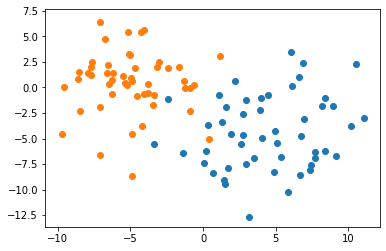

In [46]:
number_points = 100
X, y = datasets.make_blobs(n_samples=number_points, n_features=2, random_state=123, centers=2, cluster_std=3)
print(X.shape, X)
print(y.shape, y)
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
x_data = torch.Tensor(X)
y_data = torch.Tensor(y)